In [2]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import preprocessing

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
#data visualization and analysis
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [6]:
# 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

<Figure size 648x576 with 0 Axes>

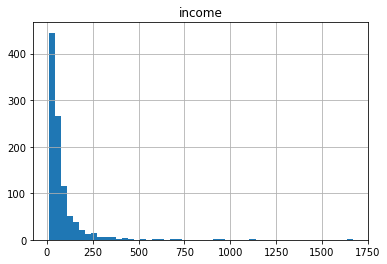

<Figure size 648x576 with 0 Axes>

In [38]:
df.hist(column='income' , bins=50)
plt.figure(figsize=(9,8))

In [8]:
# feature set
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [14]:
# to use scikit-learn library we have to convert the pandas data frame to numpy array
x= df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [11]:
# what are our labels 
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [15]:
# normalize data 
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

In [17]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=4)
print('train set:',x_train.shape , y_train.shape)
print('train set:',x_test.shape , y_test.shape)

train set: (800, 12) (800,)
train set: (200, 12) (200,)


In [21]:
# classification using knn
# import library
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# training
# lets start the algorithm with k=4
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [25]:
#predicting
y_ = neigh.predict(x_test)
y_[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

In [26]:
#accuracy evaluation
from sklearn import metrics
print("train set accuracy: ",metrics.accuracy_score(y_train , neigh.predict(x_train)))
print("test set accuracy : ",metrics.accuracy_score(y_test , y_))

train set accuracy:  0.82875
test set accuracy :  0.735


In [27]:
# we can calculate the accuracy of knn for different values of k
ks = 10
mean_acc = np.zeros((ks-1)) # this will create array like [0.,0. ....10 times]
std_acc = np.zeros((ks-1)) # this will create array like [0.,0. ....10 times]

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train , y_train)
    y_ = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test , y_)
    
    std_acc[n-1] = np.std(y_ == y_test)/np.sqrt(y_.shape[0])

mean_acc
std_acc


array([0.03019934, 0.03298485, 0.03157333, 0.03120697, 0.03139267,
       0.03041176, 0.02952753, 0.02975735, 0.02998124])

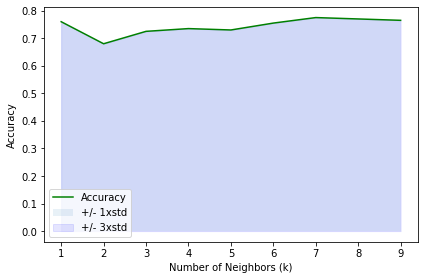

In [30]:
# plot the model accuracy for a different number of neighbors
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc+1*std_acc,alpha=0.10)
plt.fill_between(range(1,ks),mean_acc-3*std_acc+3*std_acc,alpha=0.10,color='blue')
plt.legend(('Accuracy','+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

In [31]:
print ("The best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.775 with k= 7
